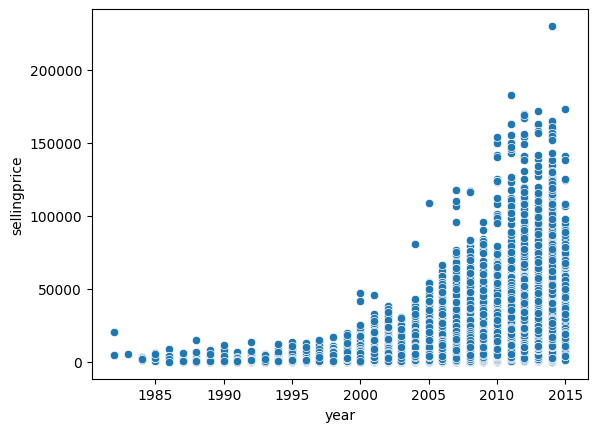

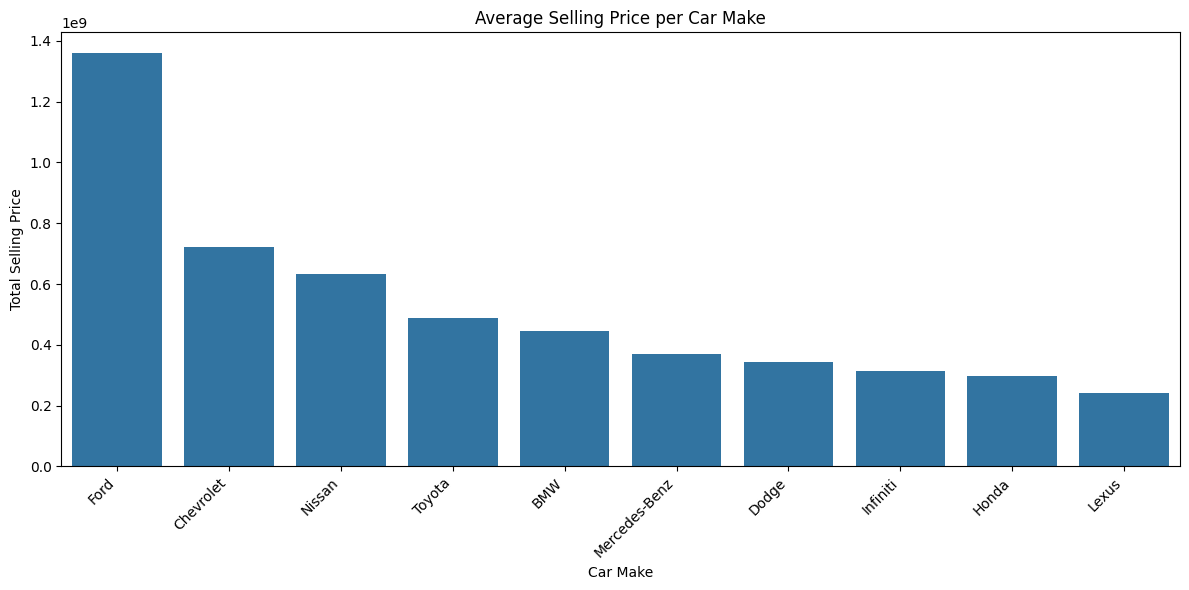

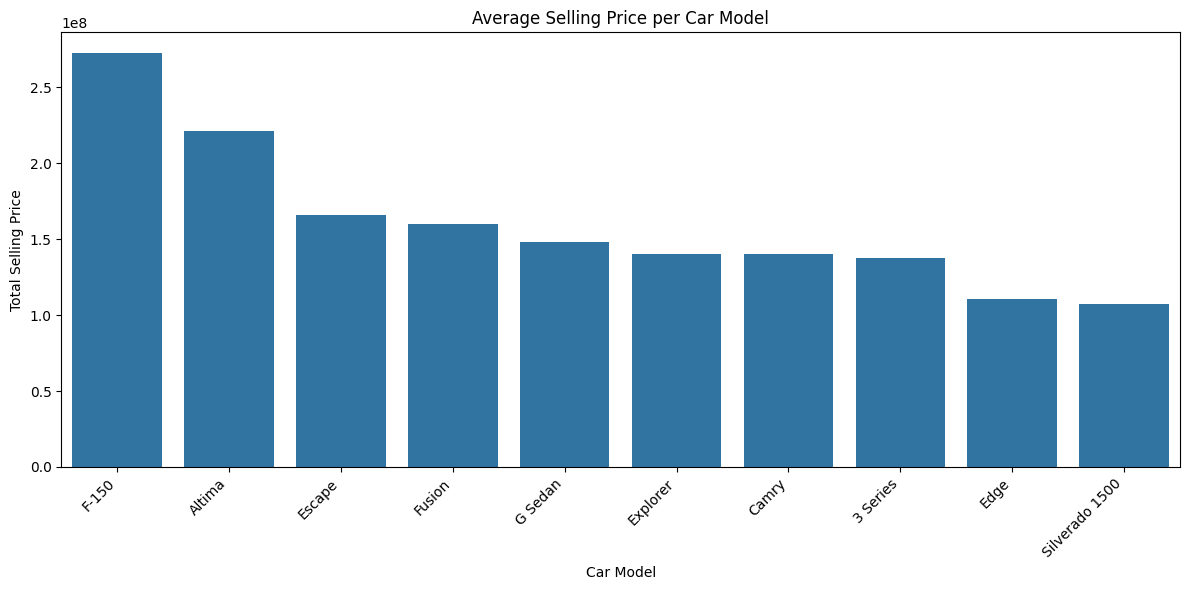

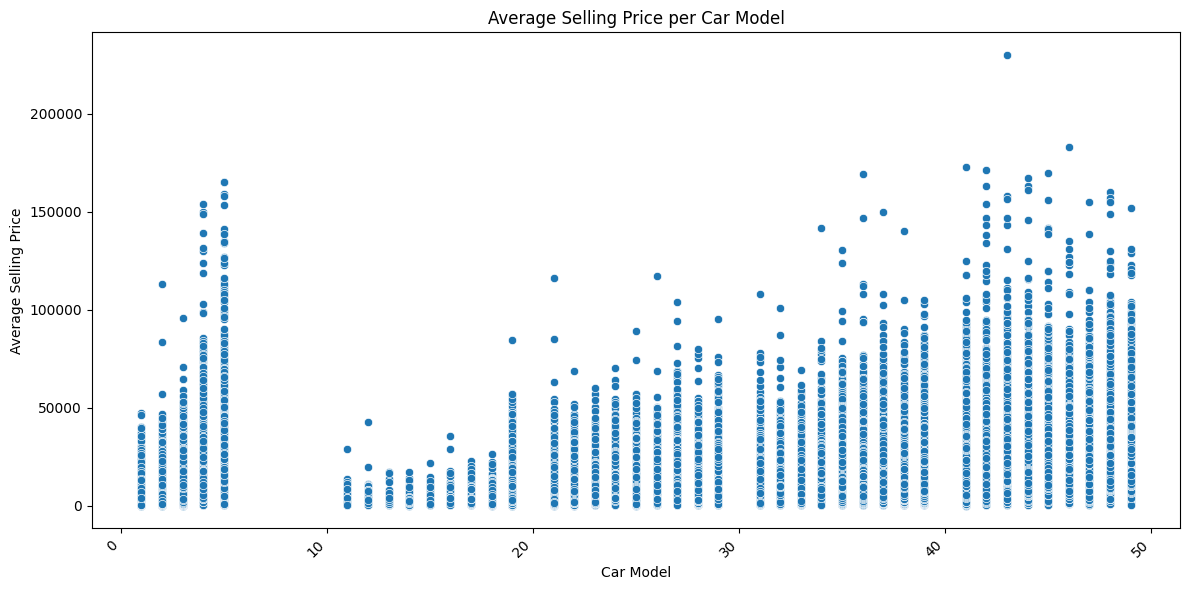

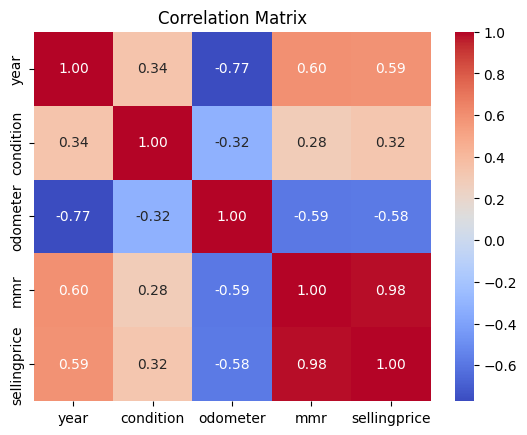

C:\Users\tasee\AppData\Local\Temp\ipykernel_3468\1277142497.py:65: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
09:05:23 - cmdstanpy - INFO - Chain [1] start processing
09:05:23 - cmdstanpy - INFO - Chain [1] done processing


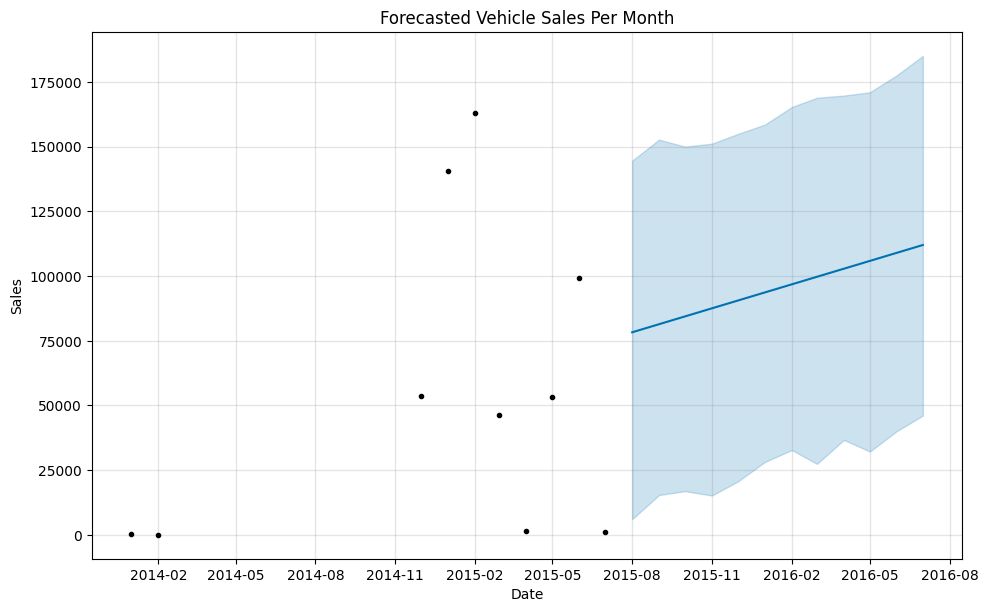

           ds           yhat    yhat_lower     yhat_upper
0  2015-08-01   78251.347254   6025.773997  144561.779641
1  2015-09-01   81372.246150  15365.607035  152705.387383
2  2015-10-01   84392.470889  16853.002723  149982.005174
3  2015-11-01   87513.369786  15174.805601  151137.369991
4  2015-12-01   90533.594524  20632.599544  154922.871083
5  2016-01-01   93654.493421  28140.729502  158505.714221
6  2016-02-01   96775.392318  32753.502370  165304.643144
7  2016-03-01   99694.942899  27383.817256  168876.148649
8  2016-04-01  102815.841795  36657.117644  169723.482151
9  2016-05-01  105836.066534  32161.350128  170991.903724
10 2016-06-01  108956.965431  40055.103180  177582.859049
11 2016-07-01  111977.190169  46073.587709  185034.901167


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv("car_prices.csv")

df.head()

sns.scatterplot(x='year',y='sellingprice', data=df)
plt.show()

make_sum_price = df.groupby('make')['sellingprice'].sum().reset_index()
make_sum_price = make_sum_price.sort_values('sellingprice', ascending=False)

top_makes = make_sum_price.head(10)  # Top 10 most expensive models

plt.figure(figsize=(12, 6))
sns.barplot(data=top_makes, x='make', y='sellingprice')
plt.xticks(rotation=45, ha='right')
plt.title('Average Selling Price per Car Make')
plt.ylabel('Total Selling Price')
plt.xlabel('Car Make')
plt.tight_layout()
plt.show()

mod_avg_price = df.groupby('model')['sellingprice'].sum().reset_index()
mod_avg_price = mod_avg_price.sort_values('sellingprice', ascending=False)

top_mod = mod_avg_price.head(10)  # Top 10 most expensive models

plt.figure(figsize=(12, 6))
sns.barplot(data=top_mod, x='model', y='sellingprice')
plt.xticks(rotation=45, ha='right')
plt.title('Average Selling Price per Car Model')
plt.ylabel('Total Selling Price')
plt.xlabel('Car Model')
plt.tight_layout()
plt.show()

make_avg_price = df.groupby('make')['sellingprice'].sum().reset_index()
make_avg_price = make_avg_price.sort_values('sellingprice', ascending=False)

make_avg_price.head(10)

cond_avg_price = df.groupby('condition')['sellingprice'].mean().reset_index()
cond_avg_price = cond_avg_price.sort_values('sellingprice', ascending=False)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='condition', y='sellingprice')
plt.xticks(rotation=45, ha='right')
plt.title('Average Selling Price per Car Model')
plt.ylabel('Average Selling Price')
plt.xlabel('Car Model')
plt.tight_layout()
plt.show()

numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Convert saledate to datetime
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
df = df.dropna(subset=['saledate'])  # drop invalid dates
df['saledate'] = df['saledate'].dt.tz_localize(None)  # make timezone naive

# Now extract month start date
df['month'] = df['saledate'].dt.to_period('M').dt.to_timestamp()

# Count sales per month
monthly_sales = df.groupby('month').size().reset_index(name='sales')

# Rename columns to Prophet format
monthly_sales = monthly_sales.rename(columns={'month': 'ds', 'sales': 'y'})

# Initialize and train Prophet model
model = Prophet()

# Fit the model
model.fit(monthly_sales)

# Create dataframe for next 12 months with monthly frequency
future = model.make_future_dataframe(periods=12, freq='MS', include_history = False)  # MS = Month Start

# Predict future sales
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title("Forecasted Vehicle Sales Per Month")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Display last 12 months forecast with confidence intervals
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))










In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
